# PCA Home Assignment
## Christian Igel, 2021

In [18]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

Load handwritten digits data:

In [19]:
digits = datasets.load_digits()
digits_2 = digits.images
imshape = digits.images[0].shape  # The 2D image shape
X = digits.images.reshape(digits.images.shape[0],-1)  # Image

Do the PCA:

In [20]:
pca = PCA()
pca.fit(X)
eigenvalues = pca.singular_values_**2

# Remove mean 
Xmean=X.mean(axis=0)
Xcentered=X-Xmean

# Compute scatter matrix/empirical covariance matrix
N = Xcentered.shape[0]  # Number of samples
S = np.dot(Xcentered.T, Xcentered)  # Sum up outer products

# Eigenvalue decomposition of empirical covariance matrix
decomp = np.linalg.eig(S / N) # Divide by number of samples  
eigenvalues_by_hand = -np.sort(-decomp[0])
explained_variance = eigenvalues_by_hand / np.sum(eigenvalues_by_hand)

explained_variance2 = pca.explained_variance_ / np.sum(pca.explained_variance_)
x = explained_variance - explained_variance2

Find out if 10 components are enough to explain 80% of the variance:

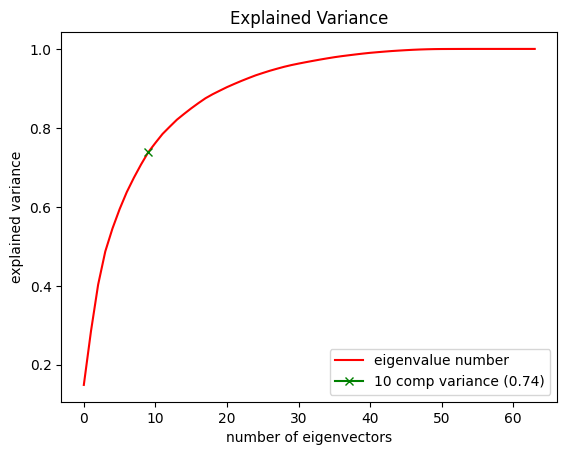

In [24]:
comp_10 = sum(explained_variance[:10])
plt.plot(np.cumsum(explained_variance), '-r', label='eigenvalue number')
plt.plot(9, comp_10, '-g', marker="x", label=f'10 comp variance ({comp_10:.02f})')
plt.legend()
plt.xlabel("number of eigenvectors")
plt.ylabel("explained variance")
# plt.yscale('log')
plt.title(f"Explained Variance")
#plt.savefig("images/exp_lin_reg.png")
plt.show()

Plot the eigenspectrum:

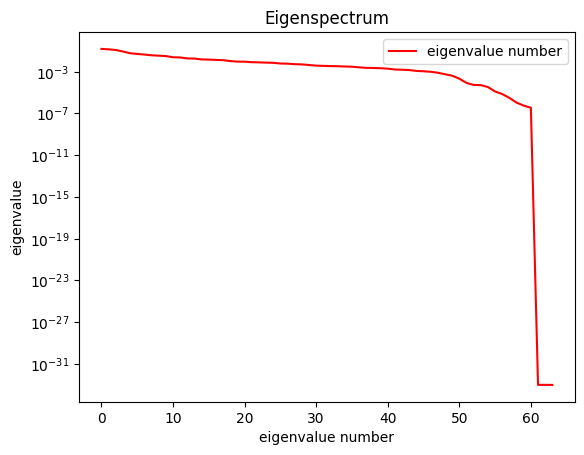

In [22]:
plt.plot(explained_variance2, '-r', label='eigenvalue number')
plt.legend()
plt.xlabel("eigenvalue number")
plt.ylabel("eigenvalue")
plt.yscale('log')
plt.title(f"Eigenspectrum")
#plt.savefig("images/exp_lin_reg.png")
plt.show()

Plot "eigendigits":

In [23]:
u = pca.components_[:n_components]
z = u.T*(digits.images[0]-np.mean(digits.images))

n_components = 50
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(1,5,sharex=True,sharey=True,figsize=(8,10))
for i in range(5):
    axes[i].imshow(eigenfaces[i].reshape(imshape), cmap="gray")
plt.show()

NameError: name 'n_components' is not defined